In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
project_path = "/scratch/nrw5cq/measles_metapop/{}"
sys.path.append(project_path.format("scripts/"))
from spatial_tsir import *

In [3]:
betas = [8,11,15,19,23,27]
betas_actual = np.linspace(8,27,6)
ks = [5,6,7,8,9]
seed = ['outflux','pop','unif','vax_ratio','vax_raw']
files_path = project_path.format("outputs/va_sensitivity_analysis/{}_{}_{}_VA_analysis.save")
print(files_path)

/scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/{}_{}_{}_VA_analysis.save


## Outflux seeding strat

In [4]:
# example
# load a few simulations beforehand
sim_list = [spatial_tSIR_pool(load=files_path.format(seed[0],betas[i],k[0])) 
            for i in range(len(betas))]

OSError: [Errno 14] Bad address

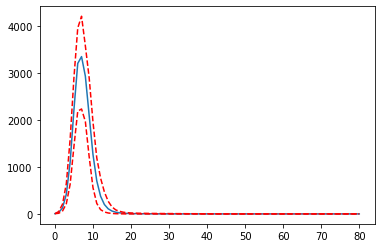

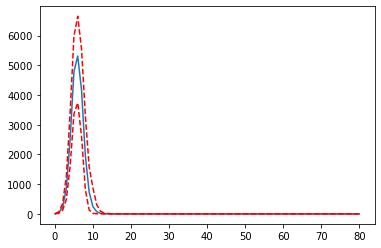

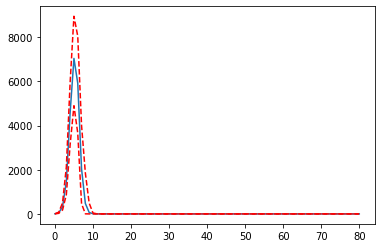

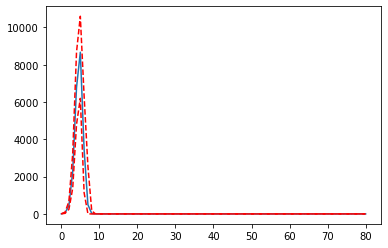

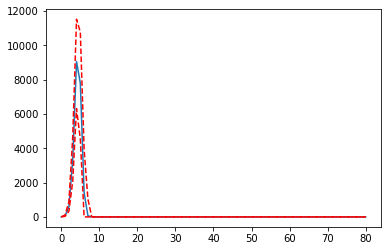

In [9]:
for pool in sim_list:
    pool.plot_interval()

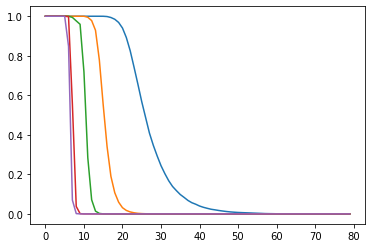

In [7]:
for pool in sim_list: # needs labels
    pool.plot_survival()

In [6]:
sim_list = [spatial_tSIR_pool(load=files_path.format(seed[0],betas[0],k[i])) 
            for i in range(len(betas))]

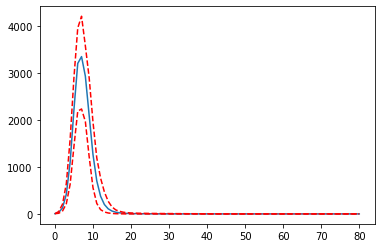

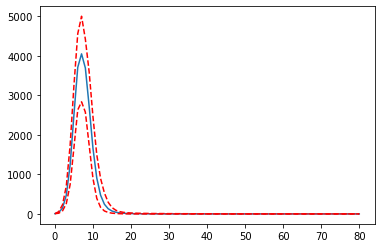

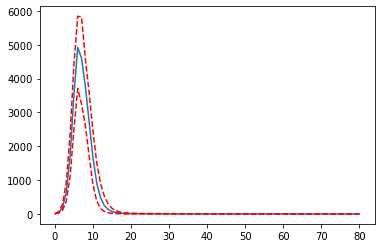

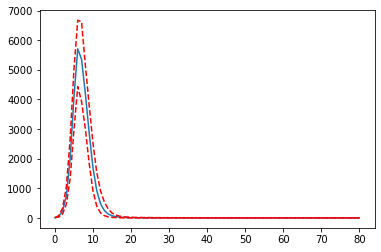

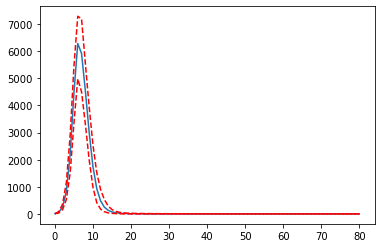

In [7]:
for pool in sim_list:
    pool.plot_interval()

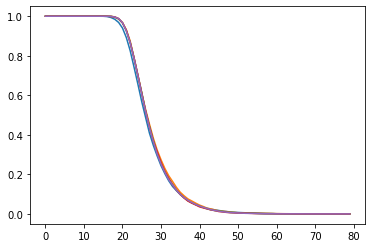

In [8]:
for pool in sim_list: # needs labels
    pool.plot_survival()

In [4]:
sim_list = [spatial_tSIR_pool(load=files_path.format(seed[i],betas[0],k[0])) 
            for i in range(len(seed))]

In [6]:
seed

['outflux', 'pop', 'unif', 'vax_ratio', 'vax_raw']

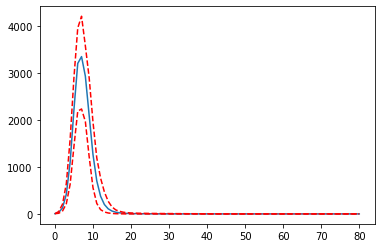

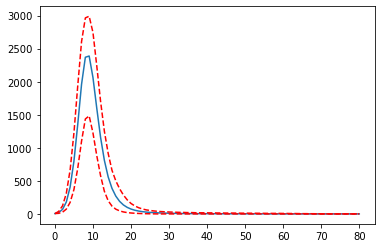

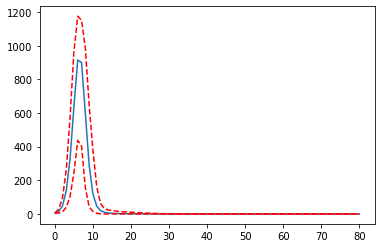

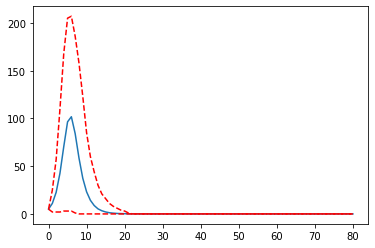

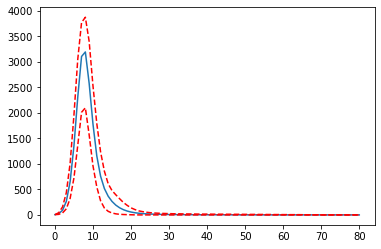

In [5]:
for pool in sim_list:
    ax = pool.plot_interval()

In [4]:
sim_list = [spatial_tSIR_pool(load=files_path.format(seed[i],betas[0],k[-1])) 
            for i in range(len(seed))]

In [5]:
seed

['outflux', 'pop', 'unif', 'vax_ratio', 'vax_raw']

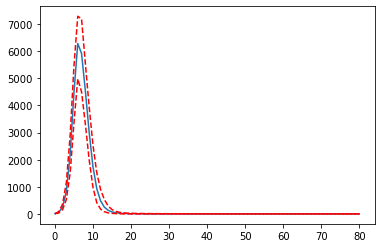

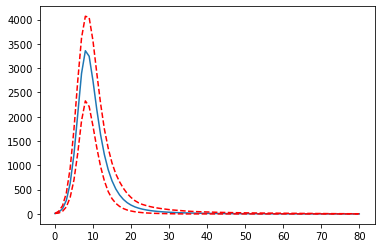

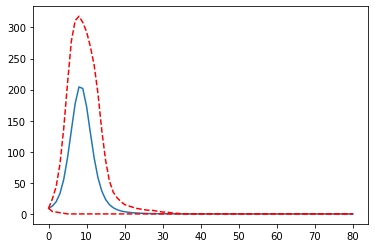

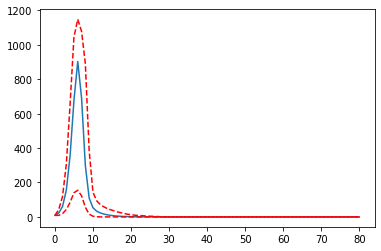

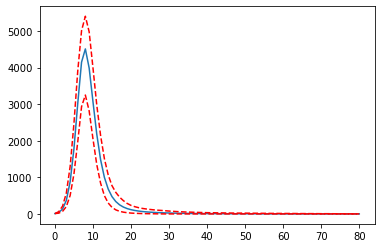

In [6]:
for pool in sim_list:
    ax = pool.plot_interval()

# Attack size vs. seeding strategy plot, facetted by beta

In [11]:
# example: how to get, load, plot the distribution of peak
# this is peak... not attack size.
sim_pool = spatial_tSIR_pool(load=files_path.format(seed[0],betas[0],k[0]))

loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/outflux_8_5_VA_analysis.save


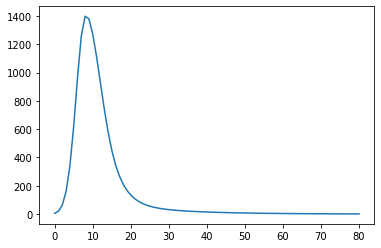

In [12]:
pool_samples = sim_pool.get_samples()
mean_path = np.mean(pool_samples.T,axis=1)
plt.plot(mean_path)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f937cbb5220>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f937cba9160>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f937cbb58e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f937cbb5ca0>}

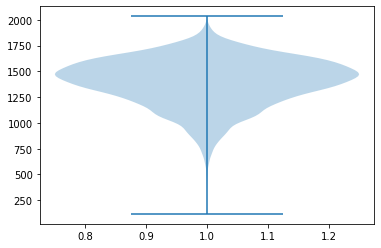

In [13]:
max_loc = np.argmax(mean_path)
plt.violinplot(pool_samples[:,max_loc])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f937caa5790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f937caa5cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937caa54c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f937cab32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f937cab3580>],
 'means': []}

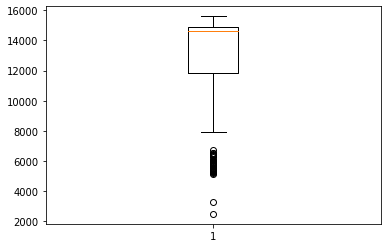

In [14]:
plt.boxplot(np.sum(pool_samples,axis=1))

# Process and save a bunch of attack size data

In [96]:
del simulations_load
import gc
gc.collect()

5089

In [100]:
#del simulations_load
beta_index = 2
k_index = 4

simulations_load = [spatial_tSIR_pool(load=files_path.format(s,betas[beta_index],k[k_index])) for s in seed]

In [92]:
attacksize_dists = []
for sim in simulations_load:
    attacksize_dist = np.sum(sim.get_samples(),axis=1)
    attacksize_dists.append(attacksize_dist)

In [78]:
np.sum(simulations_load[0].get_samples(),axis=1).shape

(8000,)

In [93]:
boxplot_data = pd.concat([pd.DataFrame({'seed':np.repeat(s,len(draws)),'draws':draws}) for s,draws in zip(seed,attacksize_dists)])
boxplot_data

,seed,draws
0,outflux,35983.0
1,outflux,35984.0
2,outflux,36097.0
3,outflux,36165.0
4,outflux,31294.0
...,...,...
7995,vax_raw,39839.0
7996,vax_raw,32220.0
7997,vax_raw,32602.0
7998,vax_raw,35131.0


In [94]:
boxplot_data.to_csv(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_seed.csv".format(betas[beta_index],k[k_index])))

In [106]:
from itertools import product
import os

In [108]:
os.path.exists(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_seed.csv").format(8,5))

True

In [109]:
# compute em all
for beta,k in product(betas,ks):
    file_path = "outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_seed.csv".format(beta,k)
    print(beta,k)
    if not os.path.exists(project_path.format(file_path)):
        simulations_load = [spatial_tSIR_pool(load=files_path.format(s,beta,k)) for s in seed]
        attacksize_dists = []
        for sim in simulations_load:
            attacksize_dist = np.sum(sim.get_samples(),axis=1)
            attacksize_dists.append(attacksize_dist)
        boxplot_data = pd.concat([pd.DataFrame({'seed':np.repeat(s,len(draws)),'draws':draws}) for s,draws in zip(seed,attacksize_dists)])
        boxplot_data.to_csv(project_path.format(file_path))
        del simulations_load
        import gc
        gc.collect()

8 5
8 6
8 7
8 8
8 9
11 5
11 6
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/outflux_11_6_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/pop_11_6_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/unif_11_6_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/vax_ratio_11_6_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/vax_raw_11_6_VA_analysis.save
11 7
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/outflux_11_7_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/pop_11_7_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/unif_11_7_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/vax_ratio_11_7_VA_analysis.save
loading /scratch/nrw5cq/measles_metapop/outputs/va_sensit

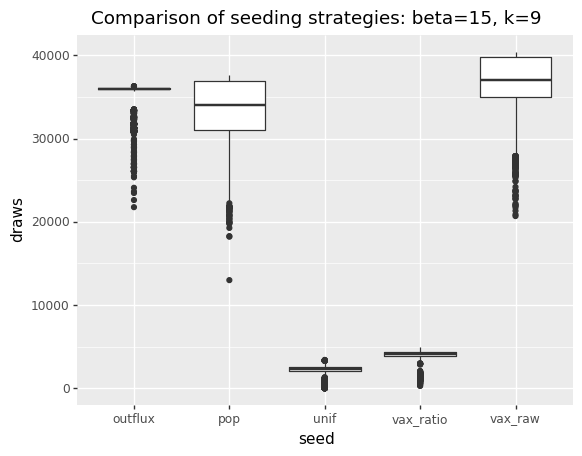

<ggplot: (8728028438110)>

In [102]:
from plotnine import *


# Reload and plot the attack size data

In [4]:
from plotnine import *

In [5]:
def read_and_aggregate(beta_id,k_id):
    result = pd.read_csv(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_seed.csv".format(beta_id,k_id)),index_col=0)\
    .groupby("seed")\
    .agg([np.mean,
          np.median, 
          lambda x: np.quantile(x,q=0.025), 
          lambda x: np.quantile(x,q=0.975)])
    result.columns = ['mean','median','2.5','97.5']
    return result

In [12]:
SAVE_PLOTS = True

## Boxplots

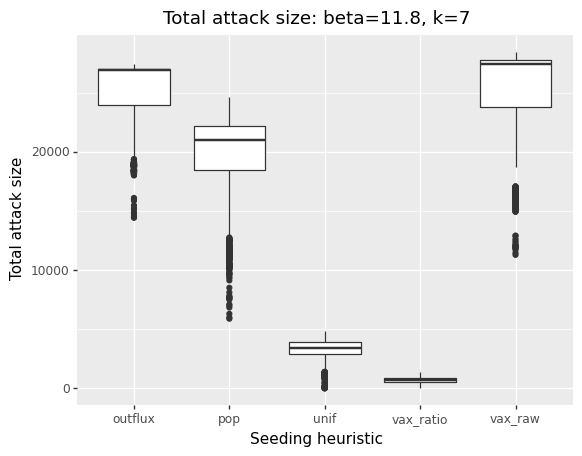

/home/nrw5cq/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/nrw5cq/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/attacksize_dists/11_7_by_seed_boxplot.svg


In [11]:
this_beta = betas[1]
this_k = ks[2]
boxplot_data = pd.read_csv(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_seed.csv".format(this_beta,this_k)),index_col=0)
plot = (
    ggplot(boxplot_data)
    + geom_boxplot(aes(x='seed',y='draws'))
    + ggtitle('Total attack size: beta={}, k={}'.format(betas_actual[1],this_k))
    + ylab("Total attack size")
    + xlab("Seeding heuristic")
)
print(plot)
if SAVE_PLOTS:
    plot.save(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_seed_boxplot.svg".format(this_beta,this_k)))

## By `k`

In [14]:
this_beta = betas[5]
merged = [read_and_aggregate(this_beta,this_k) for this_k in ks]

for df,k in zip(merged,ks):
    df.insert(0,"beta",this_beta)
    df.insert(0,"k",k)

merged = pd.concat(merged)
merged=merged.reset_index()
merged['seed']=merged['seed'].astype('category')
merged['seed']=merged['seed'].cat.reorder_categories(['outflux','pop','vax_raw','vax_ratio','unif'])
merged.head()

,seed,k,beta,mean,median,2.5,97.5
0,outflux,5,27,22264.382625,22422.0,17998.000,22422.0
1,pop,5,27,25934.098375,26583.0,20249.000,26583.0
2,unif,5,27,5339.950625,5475.0,4722.000,5735.0
3,vax_ratio,5,27,1057.222250,1077.0,536.975,1288.0
4,vax_raw,5,27,26391.312250,26861.0,20527.000,26861.0


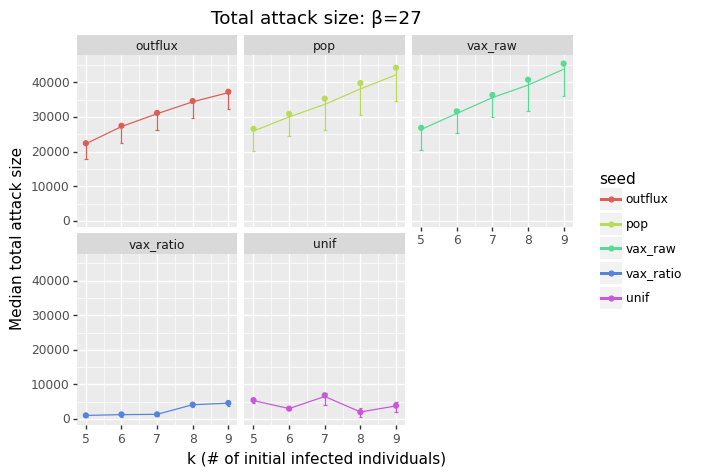

/home/nrw5cq/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/nrw5cq/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/attacksize_dists/27_7_by_k.svg


In [15]:
plot = (
    ggplot(merged,aes(color='seed',x='k'))
    #+ geom_point(aes(y='mean'))
    + geom_point(aes(y='median'),)
    + geom_line(aes(y='mean'))
    + geom_errorbar(aes(ymin='2.5',ymax='97.5'),width=0.1)
    + facet_wrap('~seed')
    + ggtitle("Total attack size: β={}".format(this_beta)) 
    + xlab("k (# of initial infected individuals)")
    + ylab("Median total attack size")
)
print(plot)
if SAVE_PLOTS:
    plot.save(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_k.svg".format(this_beta,this_k)))

## By `beta`

In [17]:
this_k = 9
merged = [read_and_aggregate(this_beta,this_k) for this_beta in betas]

for df,beta in zip(merged,betas_actual):
    df.insert(0,"beta",beta)
    df.insert(0,"k",this_k)

merged = pd.concat(merged)
merged=merged.reset_index()
merged['seed']=merged['seed'].astype('category')
merged['seed']=merged['seed'].cat.reorder_categories(['outflux','pop','vax_raw','vax_ratio','unif'])
merged.head()

,seed,k,beta,mean,median,2.5,97.5
0,outflux,9,8.0,23379.281875,23212.5,17296.625,25998.025
1,pop,9,8.0,14933.035750,15234.0,8914.350,19315.000
2,unif,9,8.0,793.314500,1065.0,13.000,1271.025
3,vax_ratio,9,8.0,2320.532125,2495.0,190.925,2864.025
4,vax_raw,9,8.0,18630.831625,19222.0,11946.800,22918.000


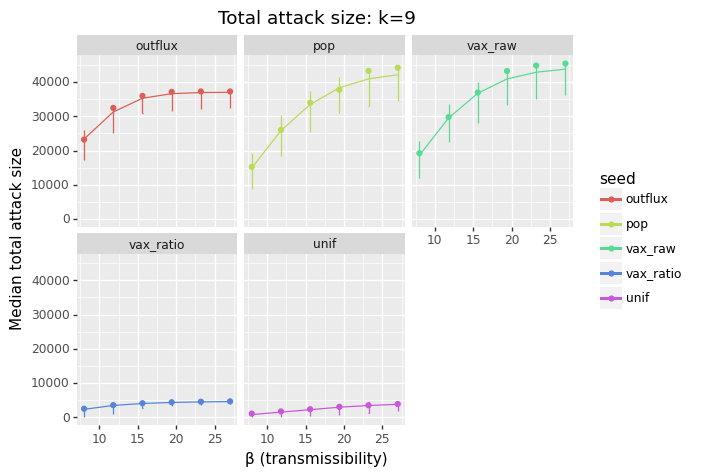

/home/nrw5cq/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/nrw5cq/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /scratch/nrw5cq/measles_metapop/outputs/va_sensitivity_analysis/attacksize_dists/27_9_by_beta.svg


In [18]:
plot = (
    ggplot(merged,aes(color='seed',x='beta'))
    #+ geom_point(aes(y='mean'))
    + geom_point(aes(y='median'))
    + geom_line(aes(y='mean'))
    + geom_errorbar(aes(ymin='2.5',ymax='97.5'),width=0.01)
    + facet_wrap('~seed')
    + ggtitle("Total attack size: k={}".format(this_k))
    + xlab("β (transmissibility)")
    + ylab("Median total attack size")
)
print(plot)
if SAVE_PLOTS:
    plot.save(project_path.format("outputs/va_sensitivity_analysis/attacksize_dists/{}_{}_by_beta.svg".format(this_beta,this_k)))